In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

%matplotlib inline

In [2]:
df = pd.read_excel('India.xlsx')

In [3]:
df

,Year,Life Expectancy
0,1991,60.3
1,1992,61.1
2,1993,61.4
3,1994,61.5
4,1995,61.9
5,1996,62.3
6,1997,62.9
7,1998,63.4
8,1999,63.9
9,2000,64.3


In [4]:
scaler = MinMaxScaler()
df[['Life Expectancy']] = scaler.fit_transform(df[['Life Expectancy']])

In [5]:
df1 = df[['Year','Life Expectancy']]

In [6]:
df1


,Year,Life Expectancy
0,1991,0.000000
1,1992,0.095238
2,1993,0.130952
3,1994,0.142857
4,1995,0.190476
5,1996,0.238095
6,1997,0.309524
7,1998,0.369048
8,1999,0.428571
9,2000,0.476190


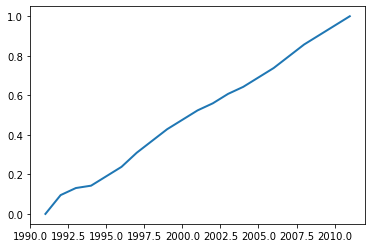

In [7]:
plt.plot(df1['Year'],df1['Life Expectancy'],linewidth=2.0)

In [8]:

X = df1['Year'].values.reshape(-1,1)
y = df1['Life Expectancy'].values.reshape(-1,1)
from sklearn.preprocessing import PolynomialFeatures 
  
poly = PolynomialFeatures(degree = 4) 
X_poly = poly.fit_transform(X) 
  
poly.fit(X_poly, y) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y) 


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
dfTest = pd.DataFrame({'Year':[2015,2018,2021,2024]})

In [10]:
pred = []
for i in dfTest['Year']:
    pred.append(lin2.predict(poly.fit_transform([[i]]))[0][0])

In [11]:
pred

[1.203832903120201, 1.3615044423786458, 1.5242891169909853, 1.6931419858592562]

In [12]:
dfTest['Life Expectancy'] = pred

In [13]:
df1 = df1.append(dfTest,ignore_index=True)

In [14]:
df1

,Year,Life Expectancy
0,1991,0.000000
1,1992,0.095238
2,1993,0.130952
3,1994,0.142857
4,1995,0.190476
5,1996,0.238095
6,1997,0.309524
7,1998,0.369048
8,1999,0.428571
9,2000,0.476190


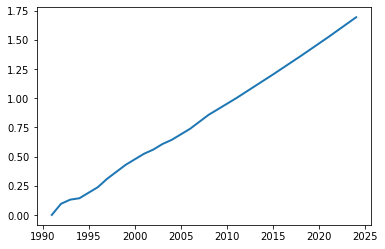

In [15]:
plt.plot(df1['Year'],df1['Life Expectancy'],linewidth=2.0)

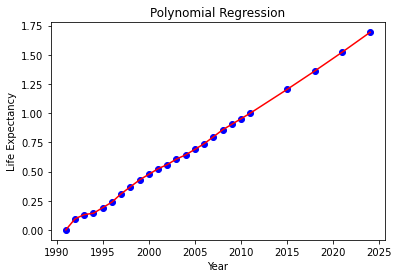

In [16]:
# Visualising the Polynomial Regression results
plt.scatter(df1['Year'], df1['Life Expectancy'], color = 'blue') 
  
plt.plot(df1['Year'], df1['Life Expectancy'], color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Year') 
plt.ylabel('Life Expectancy') 
  
plt.show()

# WRT Unproportioned Scale

In [17]:
pred = []
for i in df1['Life Expectancy']:
    pred.append(round(scaler.inverse_transform([[i]])[0][0]))

In [18]:
pred

[60.0,
 61.0,
 61.0,
 62.0,
 62.0,
 62.0,
 63.0,
 63.0,
 64.0,
 64.0,
 65.0,
 65.0,
 65.0,
 66.0,
 66.0,
 66.0,
 67.0,
 68.0,
 68.0,
 68.0,
 69.0,
 70.0,
 72.0,
 73.0,
 75.0]

In [19]:
df1['Life Expectancy'] = pred

In [20]:
df1

,Year,Life Expectancy
0,1991,60.0
1,1992,61.0
2,1993,61.0
3,1994,62.0
4,1995,62.0
5,1996,62.0
6,1997,63.0
7,1998,63.0
8,1999,64.0
9,2000,64.0


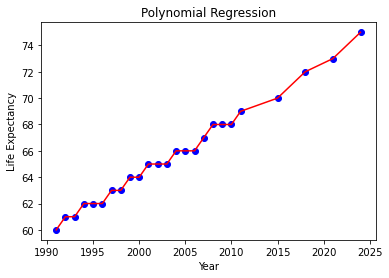

In [21]:
# Visualising the Polynomial Regression results 
plt.scatter(df1['Year'], df1['Life Expectancy'], color = 'blue') 
  
plt.plot(df1['Year'], df1['Life Expectancy'], color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Year') 
plt.ylabel('Life Expectancy') 
  
plt.show() 